<a href="https://colab.research.google.com/github/janageeth/Multilayer-Percepron-using-Diabetes-Data/blob/main/MultilayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the ARFF file

In [4]:
from scipy.io import arff
import pandas as pd

def read_arff_file(filename):
    data, meta = arff.loadarff(filename)
    return pd.DataFrame(data)

filename = 'diabetes.arff'
data_df = read_arff_file(filename)

In [5]:
# Check the first few rows of the DataFrame
print(data_df.head())

   preg   plas  pres  skin   insu  mass   pedi   age               class
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0  b'tested_positive'
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0  b'tested_negative'
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0  b'tested_positive'
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0  b'tested_negative'
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0  b'tested_positive'


In [6]:
# Check the data types of each column
print(data_df.dtypes)

preg     float64
plas     float64
pres     float64
skin     float64
insu     float64
mass     float64
pedi     float64
age      float64
class     object
dtype: object


In [17]:
# Check the shape of the DataFrame
print(data_df.shape)

(768, 9)


In [8]:
data_df['class'] = data_df['class'].map({b'tested_positive': 1, b'tested_negative': 0})

In [9]:
print(data_df.head())

   preg   plas  pres  skin   insu  mass   pedi   age  class
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0      1
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0      0
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0      1
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0      0
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0      1


In [10]:
print(data_df.dtypes)

preg     float64
plas     float64
pres     float64
skin     float64
insu     float64
mass     float64
pedi     float64
age      float64
class      int64
dtype: object


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

In [13]:
data_df['class'] = data_df['class'].astype(bool)

In [15]:
def correlation_heatmap(data_df):
    correlation_matrix = data_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

widgets.interactive(correlation_heatmap, data_df=widgets.fixed(data_df))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

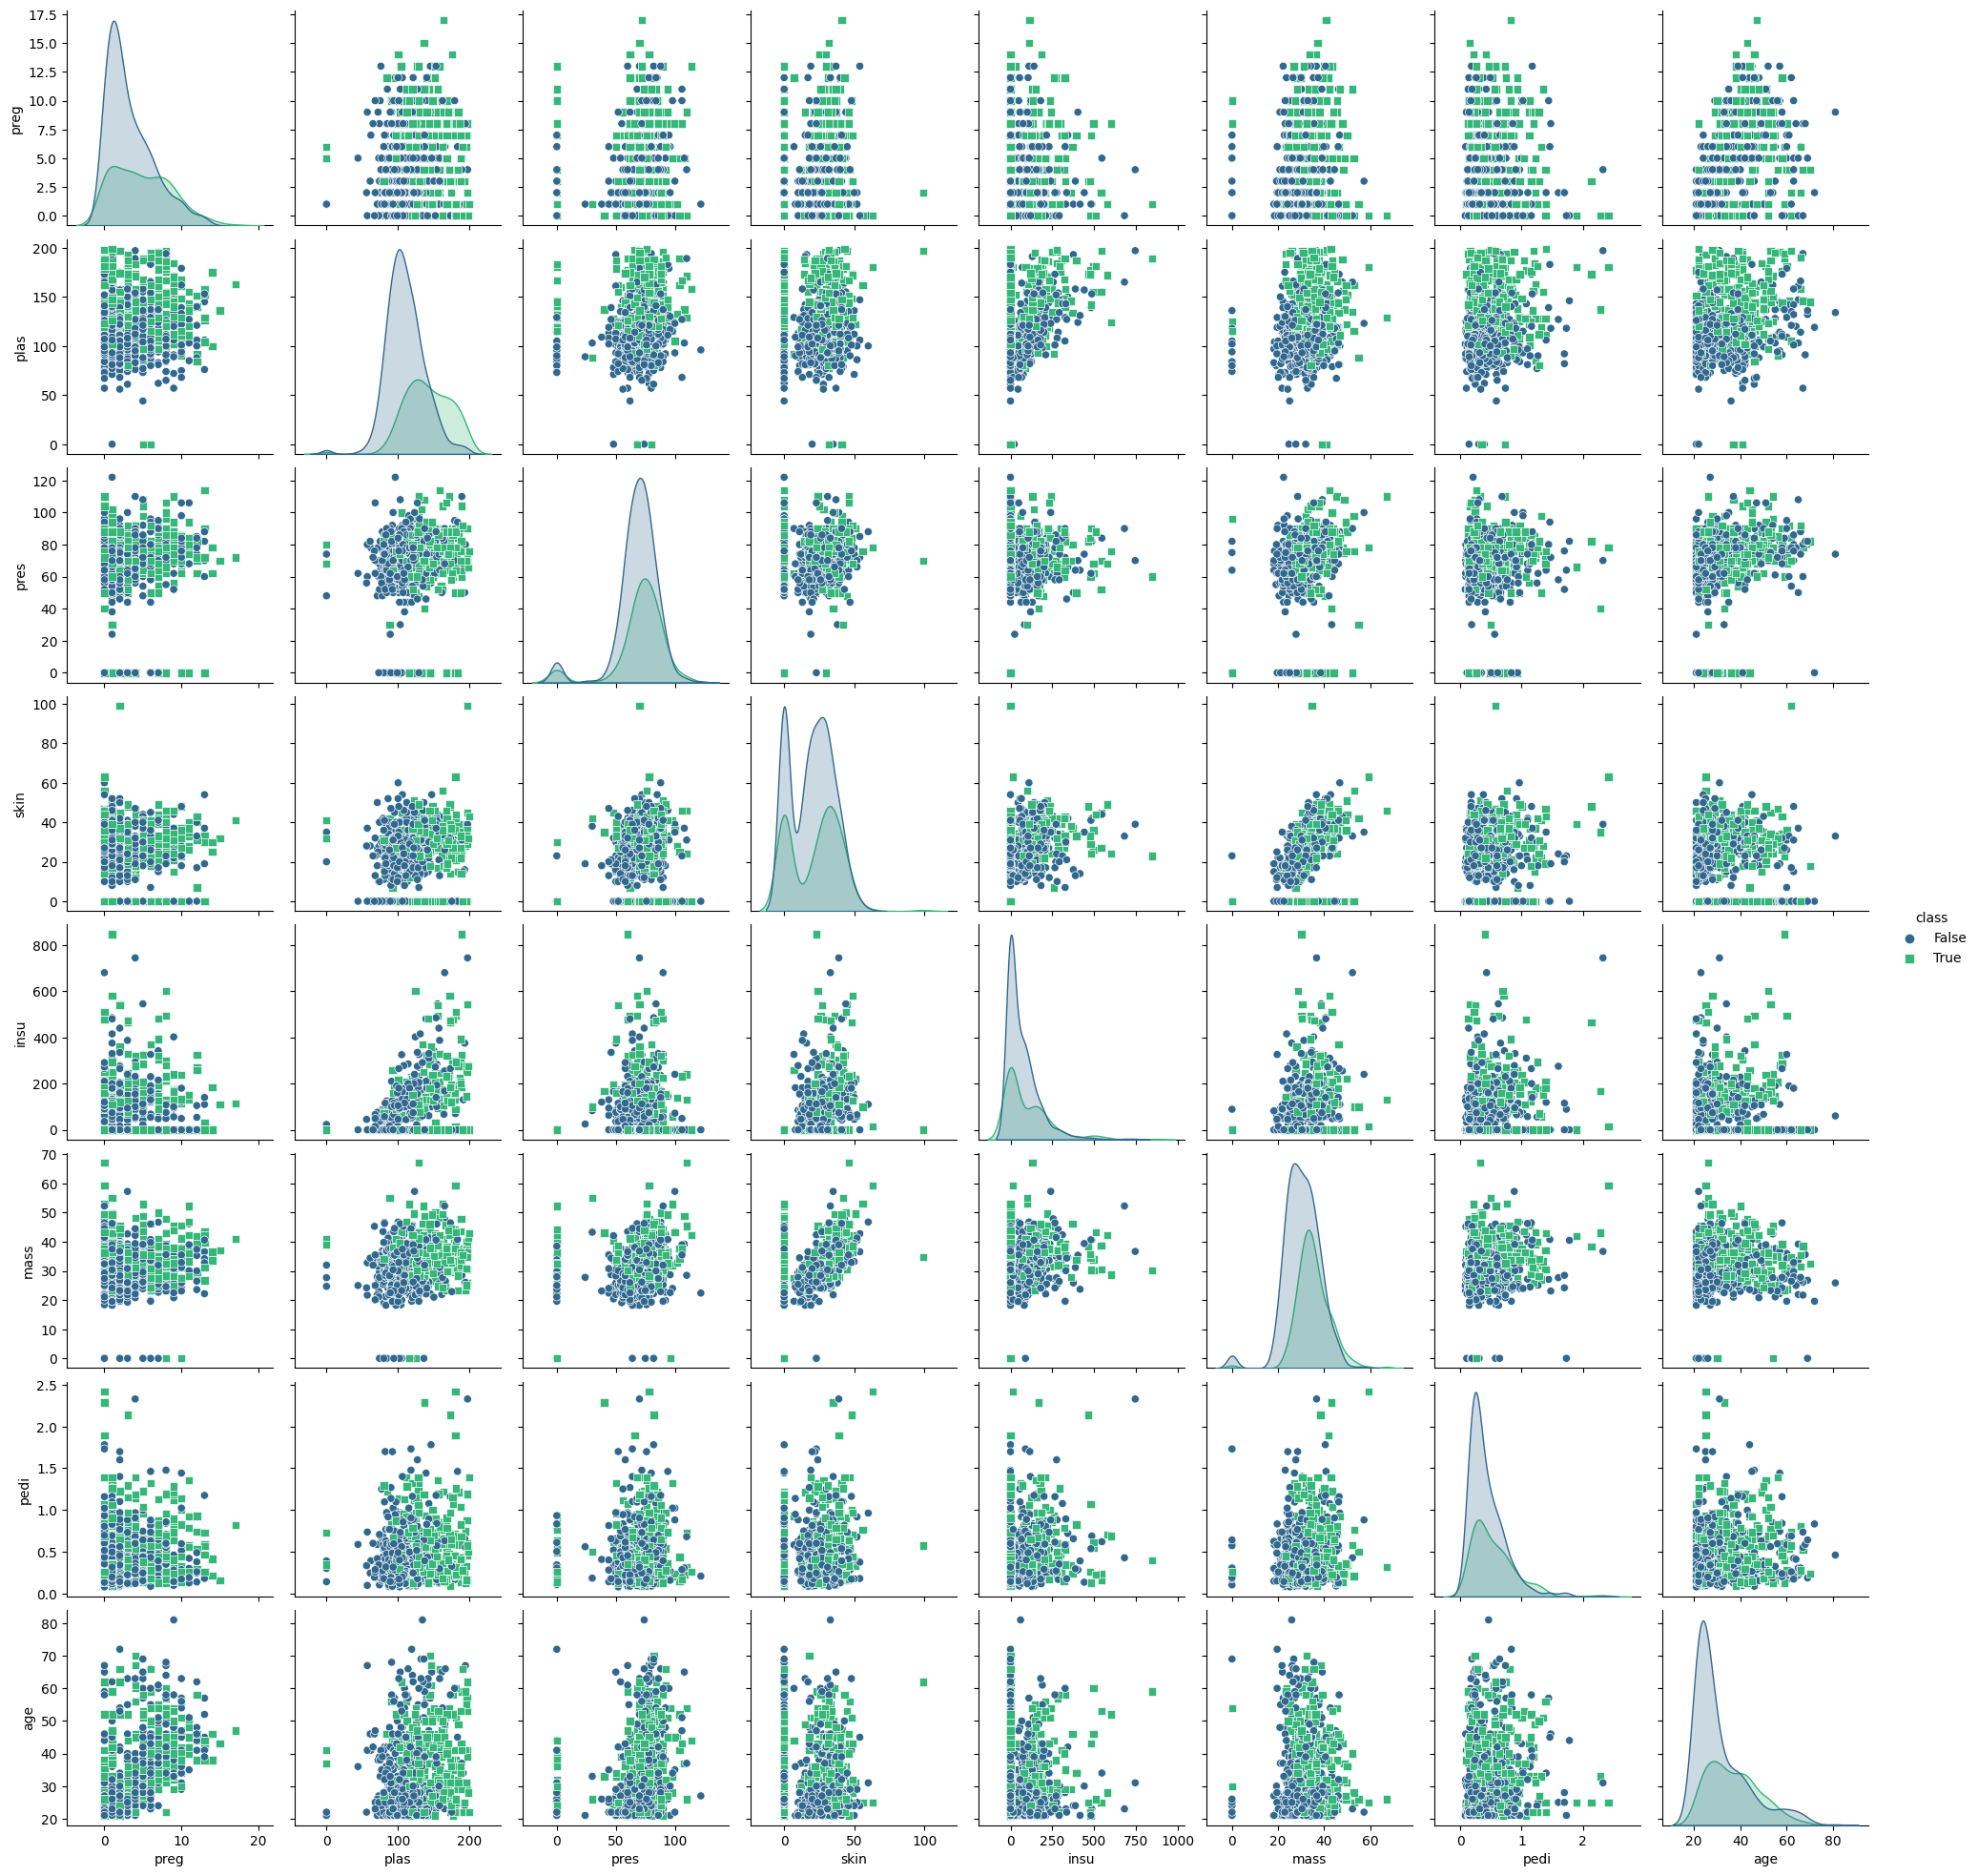

In [16]:
# Select only the first 8 columns (independent variables)
independent_variables_df = data_df.iloc[:, :8]

# Add the 'class' column as the dependent variable to the independent_variables_df
independent_variables_df['class'] = data_df.iloc[:, -1]

# Create scatter plot for each pair of variables
sns.pairplot(independent_variables_df, hue='class', markers=["o", "s"], palette="viridis")
plt.show()

## **Title: Training an ANN model to see if we can predict if they are diabetic**

A rough model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Separate the dependent and independent variable and loading them into arbitrary x and y variable in Python




In [20]:
X = data_df.iloc[:, :8].values
y = data_df.iloc[:, -1].values

Splitting the test train data under 0.85:0.15 train-test data split and locking the randomness at 42 to keep the data consistent across each runs

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Feature Scaling data in ANN to ensure that we can normalize the data

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Create and train the ANN model using standard library and calculating the training time

---



In [33]:
import time

model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42, max_iter=1000, batch_size=4, verbose=True)
start_time = time.time()
model.fit(X_train_scaled, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

Iteration 1, loss = 0.57411604
Iteration 2, loss = 0.48784458
Iteration 3, loss = 0.46494964
Iteration 4, loss = 0.45516196
Iteration 5, loss = 0.44902013
Iteration 6, loss = 0.44462801
Iteration 7, loss = 0.44175011
Iteration 8, loss = 0.43710499
Iteration 9, loss = 0.43453838
Iteration 10, loss = 0.42960570
Iteration 11, loss = 0.42971647
Iteration 12, loss = 0.42572694
Iteration 13, loss = 0.42263169
Iteration 14, loss = 0.42118106
Iteration 15, loss = 0.41949561
Iteration 16, loss = 0.41539413
Iteration 17, loss = 0.41694353
Iteration 18, loss = 0.41296140
Iteration 19, loss = 0.41056957
Iteration 20, loss = 0.41057495
Iteration 21, loss = 0.40946074
Iteration 22, loss = 0.40691906
Iteration 23, loss = 0.40573255
Iteration 24, loss = 0.40448364
Iteration 25, loss = 0.40250551
Iteration 26, loss = 0.40156733
Iteration 27, loss = 0.40127518
Iteration 28, loss = 0.40037154
Iteration 29, loss = 0.39527049
Iteration 30, loss = 0.39447389
Iteration 31, loss = 0.39437074
Iteration 32, los

Make predictions on the test set

In [34]:
y_pred = model.predict(X_test_scaled)

Calculating the performance of the model

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6293103448275862
Confusion Matrix:
[[54 22]
 [21 19]]
